# Homework 1 - Data munging and Linear Regression

Brandeis University
COSI 104-A Intro to Machine Learning
Spring 2025
Authors: Dylan Cashman and Binyamin Friedman

## Part 1: Data Munging (50 points)

### Installation
By now, you should have installed Jupyter Notebook and be familiar with how to run it with a virtual environment. To automatically install the dependencies listed in `requirements.txt`, you can run the following command in the terminal:
    
```bash
pip install -r requirements.txt
```

Alternatively, your IDE (PyCharm, or VSCode) may auto-detect the `requirements.txt` file and install the required libraries.

### Overview
[Pandas](https://pandas.pydata.org/) is a data analysis library for efficiently working with tables of data. To complete this task, you can reference their documentation on [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is Pandas' primary data structure. Pandas is built on top of [NumPy](https://numpy.org/), which is a widely-used library that provides super efficient multidimensional arrays. Many of the operations you will perform can either be done with higher-level Pandas operations, or done directly with NumPy. Either way, we want your final output to be a NumPy array, since NumPy ndarrays are the standard for use in scientific computing libraries. You can convert a Pandas DataFrame to a NumPy array with the `to_numpy()` method.
 
[scikit-learn](https://scikit-learn.org/stable/) is a machine learning library that offers many useful algorithm implementations. It has a higher level of abstraction compared to PyTorch and Tensorflow. For this assignment, you should reference their documentation on [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) and [comparing matrices](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

Note that the final line of a cell will be automatically displayed if it is not assigned to a variable. Your solution to a problem can be the last line of the cell, OR it can be assigned to a descriptive variable name.

Modify the skeleton code at your own risk.

#### Loading data
Jupyter notebooks are stateful, which means variables and imports persist between cells. After running the next cell, you will have access to the local variables `df` and `matrix` in all subsequent cells. 

In [40]:
# These aliases are standard practice for pandas and numpy
import pandas as pd
import numpy as np
from keras.src.losses import MeanSquaredError
from pandas.core.interchange.dataframe_protocol import DataFrame

# This loads the data into a Pandas DataFrame
df = pd.read_csv('sample_data.csv')

# We can always convert a dataframe to a numpy matrix by calling the `to_numpy` method
matrix = df.to_numpy()

# Display the first few rows of the dataframe
df.head()

,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,...,CURFOODSUF,CHILDFOOD,TENURE,ENERGY,INCOME,EST_ST,EST_MSA,PRIVHLTH,PUBHLTH,REGION
0,1973,1,1,7,1,1,4,0,4,-88,...,2,-88,2,1,6,34,35620.0,1,2,1
1,1945,1,1,6,3,2,1,0,1,-88,...,1,-88,2,3,2,8,NaN,1,1,4
2,1975,1,1,7,1,2,5,3,2,-99,...,1,-88,2,4,8,51,47900.0,1,2,2
3,1986,1,1,7,1,2,3,1,2,1,...,1,-88,1,4,6,20,NaN,1,2,3
4,1948,1,1,5,1,1,2,0,2,-88,...,2,-88,1,4,5,1,NaN,1,1,2


#### a) Randomly select 10 rows from the matrix without replacement to create a subset (10 points)

Remember, many basic operations can be accomplished with both Pandas and NumPy. Random selection is a method on `pandas.DataFrame` and also a function in `numpy.random`. We leave you to look at the documentation and decide which one to use.

In [41]:
# Solution here
randomdf = df.sample(n=10)
randomatrix = randomdf.to_numpy()

In [42]:
randomdf

,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,...,CURFOODSUF,CHILDFOOD,TENURE,ENERGY,INCOME,EST_ST,EST_MSA,PRIVHLTH,PUBHLTH,REGION
36475,1969,1,1,5,1,2,2,0,2,-88,...,1,-88,-88,-88,-88,49,NaN,3,3,4
49248,1967,1,1,7,1,2,4,0,4,-88,...,1,-88,2,4,8,42,NaN,1,2,1
19146,1991,2,1,6,4,2,2,0,2,-88,...,2,-88,3,4,2,24,NaN,1,2,2
21478,1962,1,1,6,-99,2,2,0,2,-88,...,-99,-88,-99,-99,-99,27,NaN,3,3,3
56614,1970,1,1,7,1,2,4,2,2,-99,...,1,-88,2,4,8,35,NaN,1,2,4
47468,1990,1,1,6,5,1,1,0,1,-88,...,1,-88,3,4,3,40,NaN,2,2,2
45104,1958,1,1,3,1,2,2,0,2,-88,...,1,-88,2,4,4,54,NaN,2,1,2
48932,1968,1,1,7,1,1,3,1,2,1,...,1,-88,2,4,6,51,NaN,1,2,2
36819,1965,1,1,3,3,1,4,3,1,-99,...,1,-88,1,2,4,22,NaN,1,1,2
50794,1989,1,1,6,1,1,2,0,2,-88,...,1,-88,-88,-88,-88,48,26420.0,3,3,2


#### b) Select all rows from the matrix where the value of the `THHLD_NUMKID` column is greater than 4 (10 points)

In [43]:
# Solution here
filtered_df = randomdf[randomdf["THHLD_NUMKID"] >= 4 ]
# I used greater than or equal to 4 cuz otherwise the filter would return an empty dataframe.

In [44]:
filtered_df

,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,...,CURFOODSUF,CHILDFOOD,TENURE,ENERGY,INCOME,EST_ST,EST_MSA,PRIVHLTH,PUBHLTH,REGION


#### c) Fetch the first sample (row) from the matrix (5 points)

In [45]:
# Solution here
randomdf.iloc[0]


TBIRTH_YEAR      1969.0
RHISPANIC           1.0
RRACE               1.0
EEDUC               5.0
MS                  1.0
EGENID_BIRTH        2.0
THHLD_NUMPER        2.0
THHLD_NUMKID        0.0
THHLD_NUMADLT       2.0
KIDS_LT5Y         -88.0
KIDS_5_11Y        -88.0
KIDS_12_17Y       -88.0
RECVDVACC           2.0
NUMDOSES          -88.0
BOOSTERRV         -88.0
HADCOVIDRV          2.0
WRKLOSSRV           2.0
ANYWORK             1.0
KINDWORK            4.0
PRICECHNG           1.0
PRICESTRESS         1.0
PRICECONCRN         1.0
EXPNS_DIF           2.0
CURFOODSUF          1.0
CHILDFOOD         -88.0
TENURE            -88.0
ENERGY            -88.0
INCOME            -88.0
EST_ST             49.0
EST_MSA             NaN
PRIVHLTH            3.0
PUBHLTH             3.0
REGION              4.0
Name: 36475, dtype: float64

#### d) Apply feature normalization to the matrix using sklearn.StandardScaler, which standardizes each feature to have a mean of 0 and a standard deviation of 1 (5 points)

Feature normalization is a common preprocessing step that adjusts the range of each feature to be within a similar scale. You can see that this operation is found in scikit-learn's preprocessing module.

In [46]:
from sklearn.preprocessing import StandardScaler

# Solution here
SC = StandardScaler().fit(randomdf)
randomdf_std=SC.transform(randomdf)

In [47]:
randomdf_std

array([[-0.33382141, -0.33333333,  0.        , -0.42008403,  0.30000344,
         0.81649658, -0.58834841, -0.58834841,  0.        , -0.24123047,
         0.65465367, -0.46010398,  0.3554425 , -1.22474487, -1.22471813,
         0.3554425 ,  0.33333333,  0.32222357,  0.85404158,  0.32591431,
         0.63713964,  0.31115595,  0.33676758,  0.3296175 ,  0.        ,
        -1.43898382, -1.44047034, -1.44055022,  0.88234595,         nan,
         1.3764944 ,  1.28571429,  1.74574312],
       [-0.50501188, -0.33333333,  0.        ,  0.98019606,  0.30000344,
         0.81649658,  1.37281295, -0.58834841,  2.5819889 , -0.24123047,
         0.65465367, -0.46010398,  0.32222357,  0.81649658,  0.81266343,
         0.32222357,  0.33333333,  0.32222357,  0.8088542 ,  0.35917087,
        -1.52718967,  0.34425764,  0.30375115,  0.3296175 ,  0.        ,
         0.64986366,  0.65973998,  0.72027511,  0.25209884,         nan,
        -0.91766294, -0.14285714, -1.52752523],
       [ 1.54927373,  3.    

#### e) Calculate the cosine similarity between two samples from the matrix by subtracting the cosine distance from 1 (10 points)

[SciPy](https://scikit-learn.org/stable/) is yet another Python library commonly used for scientific computing. SciPy has more fundamental algorithms than scikit-learn (which is focused on machine learning), related to optimization, integration, and linear algebra. Don't be overwhelmed by the number of libraries we're using! Everything is well-documented, and most of the functionality you'll need is a Google search away.

Cosine similarity is just a way of measuring the distance between two vectors. In other words, how similar they are.

In [48]:
from scipy.spatial.distance import cosine

# Select two samples from the matrix with no NaN values
# In practice, you need to decide how to handle NaN values, not just ignore them
sample1 = matrix[0]
sample2 = matrix[2]
# Solution here
cosine_distance = cosine(sample1, sample2)
cosine_similarity = 1 - cosine_distance


#### f) Calculate the product of two matrices (10 points)

Take a look at the NumPy documentation for how to perform matrix multiplication. And feel free to do it by hand if you want to double-check your answer!

In [49]:
import numpy as np

A_a = np.array([[1, 2], [4, 5], [7, 8]])
B_a = np.array([[1, 1, 0], [0, 1, 1]])

# Solution here

AB = A_a@B_a


In [50]:
AB

array([[ 1,  3,  2],
       [ 4,  9,  5],
       [ 7, 15,  8]])

## Part 2: Linear Regression (50 points)

In this part, you will use the training dataset (training_data.csv) to build a linear regression model to estimate `avgAnnCount`, `avgDeathsPerYear`, `TARGET_deathRate`, and `incidenceRate`. Then you will apply your model to the test dataset (test_data.csv) and analyze the results.

Please read the comments carefully and write your code in the designated places.

#### a) Creating a Model (15 points)
Create a linear regression model. We have supplied some important code to help you get started.
1. We load the raw data from a CSV file.
2. The preprocessing pipeline is partially defined for you. Your task is to complete the `handle_non_numeric` method. You might want to add additional preprocesing, like through scaling or normalization, if you think it helps you build a better model.
3. You should use the **normal equation** to learn the correct model parameters (you may not use sklearn.linear_model.LinearRegression, follow the procedure in the textbook instead). 
This should all result in a final variable `theta` that contains the fitted model parameters.

In [51]:
raw_data = pd.read_csv("training_data.csv")
raw_data.drop(columns=["Geography","binnedInc"],inplace=True)
raw_data.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,394.0,155,205.9,515.4,45226,74103,19.4,0.0,35.8,34.7,...,44.2,38.6,37.5,23.0,62.288674,31.426330,2.687387,0.742514,46.376922,6.645642
1,61.0,29,194.4,402.4,37644,13820,29.0,0.0,37.5,36.3,...,36.8,32.1,46.4,30.1,66.569478,31.069549,0.000000,1.479164,49.381188,8.022923
2,123.0,46,154.0,445.7,51558,20466,11.6,0.0,43.2,42.4,...,NaN,47.5,33.8,14.6,95.612840,1.916342,0.408560,0.364786,55.709216,5.726981
3,98.0,40,161.7,424.4,49583,18372,15.1,0.0,39.0,36.7,...,NaN,43.6,34.6,18.2,87.896301,0.253192,7.755394,1.854910,50.257766,6.529753
4,153.0,66,143.8,336.5,42620,50398,19.2,0.0,30.7,29.3,...,41.1,27.4,38.7,24.1,69.665525,6.350872,1.542666,17.743628,48.772162,7.197034


In [52]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

targets = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate']

# csv files are easy to work with!
# Note that Python also comes with a csv module out of the box

def handle_non_numeric(data:pd.DataFrame):
    """
    Student's solution here.

    You can drop any non-numeric data, and/or attempt to extract numerical information from it (for example, `binnedInc` is a string containing the median income of the top and bottom decile).

    :param data: data from the pipeline
    :return: data with non-numeric fields handled
    """
    rows, columns = data.shape
    data.dropna(inplace=True, axis=1, thresh = rows/2) # Drop the entire column if more than half of the column is Nah
    imr = SimpleImputer(missing_values=np.nan, strategy='mean')
    imr = imr.fit(data.values)
    data = imr.transform(data.values)
    return data

def add_bias(data: np.ndarray):
    """
    This function adds a bias term to the data. The NumPy syntax is confusing, but we
    encourage you to look up the documentation and understand what's happening here. 
    np.ones((data.shape[0], 1)) makes a Mx1 column vector of ones, and np.hstack concatenates it to the data horizontally (whereas np.vstack would concatenate vertically).
    
    :param data: data from the pipeline
    :return: data with a bias term added
    """
    return np.hstack((np.ones((data.shape[0], 1)), data))

# Here we preprocess the data:
# The sklearn pipeline is a powerful tool for chaining together data transformations. It
# chains together Transformers, which each perform some operation on data. The overall 
# pipeline is also a Transformer. This allows for some great code reusability.
# We make use of the FunctionTransformer to add our custom functions to the pipeline.
preprocess_pipeline = Pipeline([
    ('non_numeric', FunctionTransformer(handle_non_numeric)),  # Handle non-numeric fields
    ('imputer', SimpleImputer(strategy='median')),  # Fill in missing values with the median
])



In [53]:
# Separate the data into targets and preprocessed features
training_data_y = raw_data[targets].to_numpy()
# Note that in one line we drop the targets from the raw_data, and then use the pipeline with the fit_transform method
training_data_x_no_bias = preprocess_pipeline.fit_transform(raw_data.drop(targets, axis=1))
# Normalize the training data
scaler = StandardScaler()
training_data_x_features_normalized = scaler.fit_transform(training_data_x_no_bias)
# Add bias term AFTER normalization
training_data_x_normalized = add_bias(training_data_x_features_normalized)

In [54]:
training_data_x_normalized

array([[ 1.        , -0.15416778, -0.07332209, ..., -0.3558379 ,
        -0.75282862,  0.48511823],
       [ 1.        , -0.77757551, -0.24567795, ..., -0.1492078 ,
        -0.28682411,  1.18029096],
       [ 1.        ,  0.36646236, -0.22667629, ..., -0.46179054,
         0.69474303,  0.02143037],
       ...,
       [ 1.        ,  4.94557385,  0.63654972, ..., -0.24840971,
         2.39407397, -0.3632895 ],
       [ 1.        , -0.52515376, -0.27238777, ...,  0.65838951,
        -2.60719002,  1.93516166],
       [ 1.        , -0.51997377, -0.27420331, ..., -0.44844292,
         0.30607361,  1.86274262]])

In [55]:
# YOUR SOLUTION HERE - Define the normal solution and use it to learn theta
# Learn the model parameters
def normal_equation(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y
#
theta = normal_equation(training_data_x_normalized, training_data_y)

In [56]:
theta

array([[ 5.95675856e+02,  1.80635258e+02,  1.78974590e+02,
         4.48073789e+02],
       [-2.54463981e+01, -1.37787169e+01,  3.70251289e+00,
         9.75669991e+00],
       [ 1.40451798e+03,  5.21153735e+02,  1.61609463e-01,
         3.63316826e+00],
       [-2.06213441e+01, -3.62030373e+01,  2.52211533e+00,
        -3.44149326e-01],
       [ 7.96082160e+00,  6.39999841e-01,  1.11551923e+00,
         4.79136986e+00],
       [-1.43697214e+01, -3.08900084e+00, -8.75862140e-02,
         6.64480256e-01],
       [-4.82480826e+01, -1.07364092e+01, -2.97756035e+00,
        -6.86034561e+00],
       [ 7.06560822e+01,  1.50990892e+01, -1.67996842e+00,
        -2.49512338e+00],
       [ 1.80068556e+00,  1.89161804e-01, -5.20359416e-01,
        -1.92359981e+00],
       [ 9.25349758e+01, -3.99784813e+00,  1.08073657e+01,
         1.43258109e+01],
       [ 3.22297400e+01, -7.79604384e-01, -8.79416583e-01,
        -5.23522601e-01],
       [-2.80903426e+01,  2.50976111e+00,  2.84526467e+00,
      


#### b) Model Accuracy (10 points) 
Calculate the model's mean squared error (using `theta` calculated in the previous part) on both the training set and the test set. Make sure to preprocess the test set as you did on the training set. Which one is higher? Why is this the case?

Start by loading the test data from `test_data.csv`.

In [57]:
# Solution here
test_data = pd.read_csv("test_data.csv")
test_data.drop(columns=["Geography", "binnedInc"], inplace=True)
test_data_x = test_data.drop(targets, axis=1)
test_data_y = test_data[targets].to_numpy()
test_data_x.head()

,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,45040,2968,10.8,0.000000,52.8,51.8,54.0,1.95,58.5,4.6,...,53.8,39.1,35.5,12.9,96.292651,1.377953,0.000000,0.000000,49.211564,10.425532
1,38221,29457,22.7,0.000000,41.6,39.8,43.0,2.38,54.1,24.0,...,32.5,25.3,41.9,24.4,68.577014,0.246939,0.380698,0.305244,49.557522,7.388908
2,65207,29161,7.1,205.754261,33.0,32.5,33.2,3.27,59.1,12.1,...,65.5,52.5,18.1,9.3,96.387982,0.060013,1.440306,0.570121,64.657196,3.613892
3,26408,7507,38.5,0.000000,34.8,33.4,37.5,2.81,26.3,15.9,...,32.7,28.0,52.2,33.4,13.933562,85.947799,0.118640,0.000000,25.540275,4.610131
4,50874,7058,15.6,0.000000,52.0,52.9,50.8,2.29,56.9,19.4,...,NaN,36.3,37.8,13.9,95.206972,0.537400,0.348584,0.087146,54.175084,3.703704


In [58]:
test_data_x_process = preprocess_pipeline.fit_transform(test_data_x)
print(theta.shape)
print(test_data_x_process.shape)

(28, 4)
(396, 27)


In [59]:
test_data_y

array([[  23. ,   13. ,  205.3,  436. ],
       [ 161. ,   60. ,  156.8,  431.5],
       [  81. ,   20. ,  114.5,  432.5],
       ...,
       [  28. ,   13. ,  195.3,  416.4],
       [1912. ,  664. ,  142.3,  433. ],
       [ 101. ,   49. ,  209.4,  431.7]])

In [60]:
# Preprocess the test features using the same pipeline
test_data_x_no_bias = preprocess_pipeline.transform(test_data_x)

# Normalize test feature columns using the same scaler
test_data_x_features_normalized = scaler.transform(test_data_x_no_bias)

# Add bias term AFTER normalization
test_data_x_normalized = add_bias(test_data_x_features_normalized)

In [61]:
predictions = test_data_x_normalized @ theta

In [62]:
mse=MeanSquaredError()

In [63]:
train_predictions = training_data_x_normalized @ theta
train_mse = mse(training_data_y, train_predictions)
test_mse = mse(test_data_y, predictions)

In [64]:
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 59182.29296875
Test MSE: 77923.171875


*Explanation here*

Test MSE higher than that of Training, while training set MSE is already pretty high. This suggest the training did not capture all the features. And linear model probably isn't the right model for this dataset.



#### c) Analyzing the Learned Parameters (10 points)
For each target attribute, what are the most and least predictive features for our `target`? Explain why these make sense. The definitions of the data attributes should be helpful for theorizing why certain features are predictive. They can be found in `README.md`.

HINT: Everything you need to know is in the `theta` variable.

In [65]:
predictions

array([[ 554.2657349 ,   53.04695524,  156.33492653,  425.26297814],
       [ 248.7487617 ,   55.36550105,  177.05124079,  412.74371607],
       [ 192.15970568,   11.20826974,  150.43885312,  422.82103903],
       ...,
       [ 161.36225411,  108.94943264,  195.25391612,  466.18753996],
       [2033.69379997,  658.47332737,  147.64426885,  412.28569042],
       [ 112.17810952,   55.19429987,  193.17224257,  450.86552816]])

In [66]:
test_data_y

array([[  23. ,   13. ,  205.3,  436. ],
       [ 161. ,   60. ,  156.8,  431.5],
       [  81. ,   20. ,  114.5,  432.5],
       ...,
       [  28. ,   13. ,  195.3,  416.4],
       [1912. ,  664. ,  142.3,  433. ],
       [ 101. ,   49. ,  209.4,  431.7]])

In [67]:
theta

array([[ 5.95675856e+02,  1.80635258e+02,  1.78974590e+02,
         4.48073789e+02],
       [-2.54463981e+01, -1.37787169e+01,  3.70251289e+00,
         9.75669991e+00],
       [ 1.40451798e+03,  5.21153735e+02,  1.61609463e-01,
         3.63316826e+00],
       [-2.06213441e+01, -3.62030373e+01,  2.52211533e+00,
        -3.44149326e-01],
       [ 7.96082160e+00,  6.39999841e-01,  1.11551923e+00,
         4.79136986e+00],
       [-1.43697214e+01, -3.08900084e+00, -8.75862140e-02,
         6.64480256e-01],
       [-4.82480826e+01, -1.07364092e+01, -2.97756035e+00,
        -6.86034561e+00],
       [ 7.06560822e+01,  1.50990892e+01, -1.67996842e+00,
        -2.49512338e+00],
       [ 1.80068556e+00,  1.89161804e-01, -5.20359416e-01,
        -1.92359981e+00],
       [ 9.25349758e+01, -3.99784813e+00,  1.08073657e+01,
         1.43258109e+01],
       [ 3.22297400e+01, -7.79604384e-01, -8.79416583e-01,
        -5.23522601e-01],
       [-2.80903426e+01,  2.50976111e+00,  2.84526467e+00,
      

In [68]:
# Solution here
max = pd.DataFrame(theta).max()
idmax = pd.DataFrame(theta).idxmax()


In [69]:
pd.DataFrame([max,idmax])

,0,1,2,3
0,1404.517977,521.153735,178.97459,448.073789
1,2.000000,2.000000,0.00000,0.000000


In [70]:
min = pd.DataFrame(theta).min()
idmin = pd.DataFrame(theta).idxmin()
pd.DataFrame([min,idmin])

,0,1,2,3
0,-115.829691,-36.203037,-12.492856,-17.817292
1,26.000000,3.000000,26.000000,26.000000


*Explanation here*

The most predictive feature for each attribute is the feature with biggest weight, and vice versa. For example, the most important feature for AvgAnnuCount is located at row 2, poverty percent.


#### d) Plotting Data (10 points) 
Knowing how to visualize data and share your findings is a critical skill. Matplotlib is a widely-used library for plotting scientific data. If you are unfamiliar with it, you can reference their [documentation](https://matplotlib.org/stable/contents.html) or look at some of the many tutorials available online.

For this question, you will create two plots,
 1. Plot the `medIncome` attribute against the `incidenceRate` attribute in the test data (remember to apply your preprocessing pipeline). On top of this, overlay the linear regression model's best fit line (HINT: The slope and y-intercept are stored in `theta`).
 2. Do the same for the `medIncome` attribute against the `avgDeathsPerYear` attribute.

What interesting conclusion could you *possibly* draw from these plots?

We provide code to generate the scatterplot and best fit line for the first plot.  You must include a title, labels for the x and y axes, and a legend to differentiate the data points from the regression line.  Then, you must generate the second plot on your own.


In [71]:
test_data.drop(targets, axis=1).dropna()

,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,38221,29457,22.7,0.000000,41.6,39.8,43.0,2.38,54.1,24.0,...,32.5,25.3,41.9,24.4,68.577014,0.246939,0.380698,0.305244,49.557522,7.388908
9,27875,7230,32.4,0.000000,31.7,26.5,38.7,3.31,32.8,25.2,...,24.1,21.6,45.8,29.9,84.905138,0.083091,1.869547,11.951253,41.778846,6.831490
13,43972,103451,16.4,115.996945,430.8,32.3,39.2,2.51,52.8,12.3,...,44.4,28.6,36.2,16.0,70.528483,21.755864,2.466252,2.040211,51.820289,6.903027
29,56797,70928,13.9,0.000000,46.3,44.3,48.1,2.47,57.0,16.9,...,48.3,40.4,36.4,16.7,78.990375,12.277736,1.389569,4.478652,55.725588,5.818293
31,32366,71474,33.1,307.804237,33.4,32.3,34.4,3.67,34.8,25.8,...,24.7,22.4,50.8,38.8,23.240530,0.612833,0.427042,1.056514,40.001038,6.518302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,46427,53070,16.6,18.843038,38.5,38.1,39.0,2.75,47.6,23.8,...,45.0,39.7,32.5,19.6,79.213199,17.522495,0.559328,1.062536,51.258942,6.743599
364,36627,5977,24.1,0.000000,38.2,37.4,38.6,2.71,53.8,26.7,...,33.6,28.0,40.3,28.3,89.995006,3.878808,0.000000,3.712336,52.672453,4.238619
366,85886,1501587,7.7,181.807648,40.6,39.1,42.0,2.98,51.4,10.8,...,61.7,55.7,26.2,12.0,80.948638,7.662320,3.781605,4.950535,57.618624,4.419519
377,51931,63360,13.5,0.000000,38.3,37.5,38.9,2.88,56.7,17.6,...,54.8,47.9,27.4,14.7,88.428851,7.219147,1.820254,0.704982,59.929685,4.117165


In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Solution here

attribute = 'medIncome'
target = 'incidenceRate'
"""
This function plots the given attribute against the target variable. You must fill it out to overlay the best fit line from the model, and add labels and a title.
:param attribute: The attribute to plot on the x-axis
:param target: The target variable to plot on the y-axis
"""

# We preprocess the test data to get the transformed x values
# This is necessary for overlaying the best fit line, since the model's parameters are learned from preprocessed data
test_data_x

# We get the index of the attribute and target in the final frame. This is necessary
# because your handle_non_numeric function will change the indices of some of the
# columns.
final_frame = test_data.drop(targets, axis=1)
attribute_index = final_frame.columns.get_loc(attribute) + 1  # +1 because of the bias term
target_index = targets.index(target)
x_values = final_frame.iloc[:, attribute_index - 1]
y_values = test_data[target]

x_values=handle_non_numeric(pd.DataFrame(x_values))

In [73]:
theta


array([[ 5.95675856e+02,  1.80635258e+02,  1.78974590e+02,
         4.48073789e+02],
       [-2.54463981e+01, -1.37787169e+01,  3.70251289e+00,
         9.75669991e+00],
       [ 1.40451798e+03,  5.21153735e+02,  1.61609463e-01,
         3.63316826e+00],
       [-2.06213441e+01, -3.62030373e+01,  2.52211533e+00,
        -3.44149326e-01],
       [ 7.96082160e+00,  6.39999841e-01,  1.11551923e+00,
         4.79136986e+00],
       [-1.43697214e+01, -3.08900084e+00, -8.75862140e-02,
         6.64480256e-01],
       [-4.82480826e+01, -1.07364092e+01, -2.97756035e+00,
        -6.86034561e+00],
       [ 7.06560822e+01,  1.50990892e+01, -1.67996842e+00,
        -2.49512338e+00],
       [ 1.80068556e+00,  1.89161804e-01, -5.20359416e-01,
        -1.92359981e+00],
       [ 9.25349758e+01, -3.99784813e+00,  1.08073657e+01,
         1.43258109e+01],
       [ 3.22297400e+01, -7.79604384e-01, -8.79416583e-01,
        -5.23522601e-01],
       [-2.80903426e+01,  2.50976111e+00,  2.84526467e+00,
      

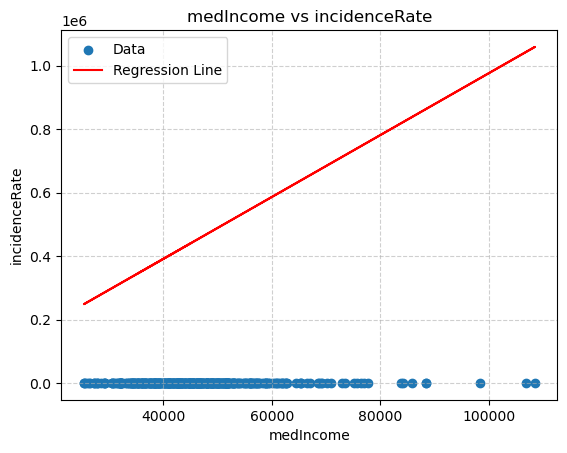

In [74]:

plt.scatter(x_values, y_values, label='Data')

best_fit_line = theta[attribute_index][target_index] * x_values + theta[0][target_index]

plt.plot(x_values, best_fit_line, color='red', label='Regression Line')

# YOUR CODE: Add a title, labels, and a legend
plt.title(f"{attribute} vs {target}")
plt.xlabel(attribute)
plt.ylabel(target)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [75]:
attribute = 'medIncome'
target = 'avgDeathsPerYear'
"""
This function plots the given attribute against the target variable. You must fill it out to overlay the best fit line from the model, and add labels and a title.
:param attribute: The attribute to plot on the x-axis
:param target: The target variable to plot on the y-axis
"""

# We preprocess the test data to get the transformed x values
# This is necessary for overlaying the best fit line, since the model's parameters are learned from preprocessed data
test_data_x

# We get the index of the attribute and target in the final frame. This is necessary
# because your handle_non_numeric function will change the indices of some of the
# columns.
final_frame = test_data.drop(targets, axis=1)
attribute_index = final_frame.columns.get_loc(attribute) + 1  # +1 because of the bias term
target_index = targets.index(target)
x_values = final_frame.iloc[:, attribute_index - 1]
y_values = test_data[target]

x_values=handle_non_numeric(pd.DataFrame(x_values))

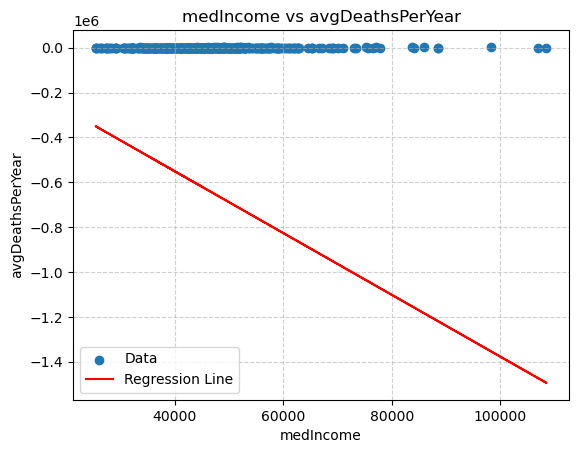

In [76]:
plt.scatter(x_values, y_values, label='Data')

best_fit_line = theta[attribute_index][target_index] * x_values + theta[0][target_index]

plt.plot(x_values, best_fit_line, color='red', label='Regression Line')

# YOUR CODE: Add a title, labels, and a legend
plt.title(f"{attribute} vs {target}")
plt.xlabel(attribute)
plt.ylabel(target)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

*Explanation here*

We see that incidence rate is positively correlated with median income, while average deaths per year is negatively correlated with median income. It's likely that since wealthier areas have access to better healthcare, they have lower death rates but higher diagnosis rates.

#### README.md (5 points)
In the README cell below, please explain how to run your code, load the model, and interpret the results. The README should provide any necessary information about the code environment and give a broad overview of what your code accomplishes, so that someone unfamiliar with the project could understand its parts.

*README.md*

## Author: Eric

*Environment*
```
pip install -r requirements.txt
```

*Run the code*

hit "run all cell"

*Project*
this project preprocesses and train a linear regression model of a dataset, then tests the dataset, calculating the mean squared error, and plot some of the findings


